In [2]:
import pickle
import pandas as pd
import tensorflow as tf
import numpy as np
from numpy.linalg import norm
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from sklearn.neighbors import NearestNeighbors
import cv2

In [3]:
# Function to extract features from an image
def extract_features(img_path, model):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    expanded_img_array = np.expand_dims(img_array, axis=0)
    preprocessed_img = preprocess_input(expanded_img_array)
    result = model.predict(preprocessed_img).flatten()
    normalized_result = result / norm(result)
    return normalized_result

# Load pre-trained ResNet50 model
model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model.trainable = False

# Build a Sequential model for feature extraction
model = tf.keras.Sequential([
    model,
    GlobalMaxPooling2D()
])

In [4]:
# Load pre-trained ResNet50 model
model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model.trainable = False

# Build a Sequential model for feature extraction
model = tf.keras.Sequential([
    model,
    GlobalMaxPooling2D()
])

In [5]:
# Load features and metadata from numpy array
data = np.load('extracted_features.npz')
feature_list = data['features']
user_ids = data['user_id']
outfit_ids = data['outfit_id']
item_ids = data['item_id']

In [6]:
# Initialize NearestNeighbors model
neighbors = NearestNeighbors(n_neighbors=5, algorithm='brute', metric='euclidean')
neighbors.fit(feature_list)

NearestNeighbors(algorithm='brute', metric='euclidean')

In [7]:
img_path = r'D:\BMS\8th sem\PW\Fashion Recommendation System\test-dataset\3140\1502413\3771200_m.jpg'

# Extract features from the input image
input_features = extract_features(img_path, model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


In [8]:
distances, indices = neighbors.kneighbors([input_features])

# Print the nearest neighbors along with their metadata
for i, index in enumerate(indices[0]):
    print(f"Neighbor {i+1}:")
    print(f"User ID: {user_ids[index]}, Outfit ID: {outfit_ids[index]}, Item ID: {item_ids[index]}")
    print(f"Distance: {distances[0][i]}")
    print()


Neighbor 1:
User ID: 1843857, Outfit ID: 2852794, Item ID: 6488309_m.jpg
Distance: 0.4898824393749237

Neighbor 2:
User ID: 1583224, Outfit ID: 2853203, Item ID: 6488309_m.jpg
Distance: 0.4898824393749237

Neighbor 3:
User ID: 1103160, Outfit ID: 3836759, Item ID: 32695603_m.jpg
Distance: 0.5020254254341125

Neighbor 4:
User ID: 2128658, Outfit ID: 3867121, Item ID: 32695603_m.jpg
Distance: 0.5020254254341125

Neighbor 5:
User ID: 1974083, Outfit ID: 3429140, Item ID: 7301663_m.jpg
Distance: 0.5076176524162292



Neighbor 1:
User ID: 1843857, Outfit ID: 2852794, Item ID: 6488309_m.jpg
Distance: 0.4898824393749237


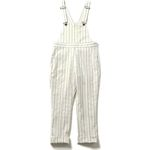

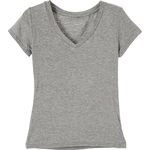


Neighbor 2:
User ID: 1583224, Outfit ID: 2853203, Item ID: 6488309_m.jpg
Distance: 0.4898824393749237


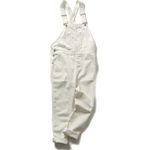

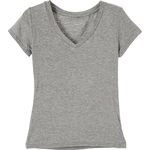


Neighbor 3:
User ID: 1103160, Outfit ID: 3836759, Item ID: 32695603_m.jpg
Distance: 0.5020254254341125


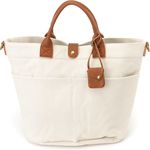

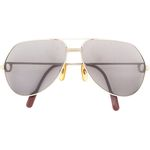

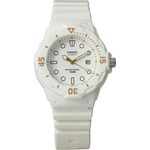

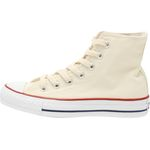

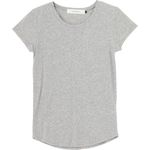

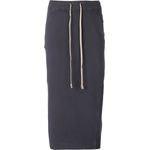

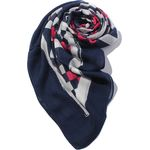

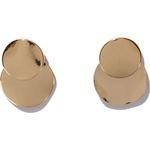

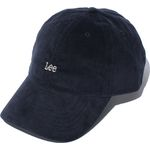


Neighbor 4:
User ID: 2128658, Outfit ID: 3867121, Item ID: 32695603_m.jpg
Distance: 0.5020254254341125


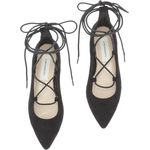

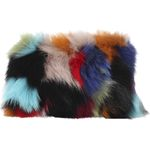

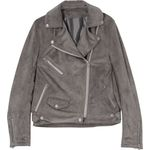

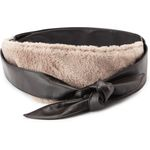

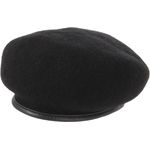

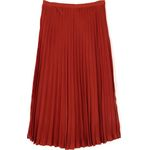

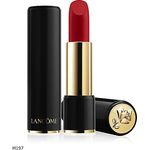

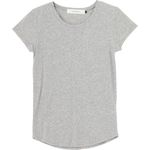

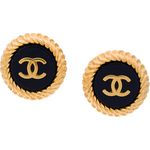


Neighbor 5:
User ID: 1974083, Outfit ID: 3429140, Item ID: 7301663_m.jpg
Distance: 0.5076176524162292


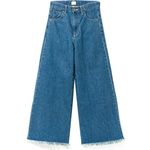

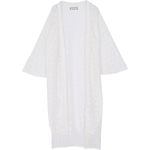

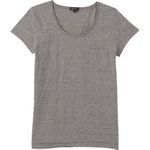

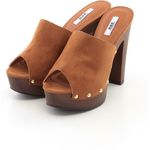

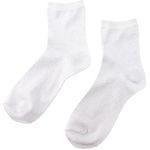

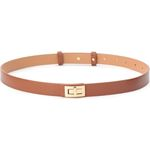

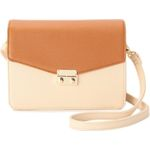

In [17]:
import os
from IPython.display import display, Image

# Assuming you have already defined variables user_ids, outfit_ids, item_ids, distances, and indices

# Print the nearest neighbors along with their metadata and display the images
for i, index in enumerate(indices[0]):
    print(f"Neighbor {i+1}:")
    print(f"User ID: {user_ids[index]}, Outfit ID: {outfit_ids[index]}, Item ID: {item_ids[index]}")
    print(f"Distance: {distances[0][i]}")
    
    # Construct the directory path for the outfit
    outfit_dir = f'D:\\BMS\\8th sem\\PW\\Fashion Recommendation System\\IQON3000\\{user_ids[index]}\\{outfit_ids[index]}'
    
    # List all files in the outfit directory
    files = os.listdir(outfit_dir)
    
    # Display all images except for the item itself
    for file in files:
        if file.endswith(".jpg") and file != f'{item_ids[index]}.jpg':
            img_path = os.path.join(outfit_dir, file)
            display(Image(filename=img_path))
    
    print()
